In [1]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics  
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from xgboost_model import XGBModel
import plotly.express as px
from IPython.display import Image, display


In [2]:
TRAIN_PATH = "/Users/ben/python_projects/mini_pw/wzum/src/data/preprocessed_train_data.csv"

In [48]:
# Process of loading data into dataframes
train_data = pd.read_csv(TRAIN_PATH)
split_len = int(len(train_data)*0.8)
train_data, test_data = train_data[:split_len], train_data[split_len:]

train_data.drop(["date"], axis=1, inplace=True)
test_dates = pd.to_datetime(test_data["date"])
test_data.drop(["date"], axis=1, inplace=True)

X_train = train_data.drop(["sales"], axis=1)
y_train = train_data["sales"]

X_test = test_data.drop(["sales"], axis=1)
y_test = test_data['sales']

In [32]:
train_data.head()

,store_nbr,family,sales,onpromotion,holiday_event_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,transactions,paid_day
2645688,42,12,2657.000,52.0,4,2,16,50,1,52.380000,3,0,3,2,993.0,0
1299855,30,18,167.000,0.0,0,1,4,53,0,53.450000,8,6,2,3,1236.0,1
1866178,20,28,438.051,1.0,4,2,16,50,1,41.020000,18,12,1,6,1685.0,0
571605,47,12,13139.000,0.0,4,2,16,50,1,93.286667,18,12,0,14,5023.0,0
2344430,4,11,85.000,1.0,4,2,16,50,1,43.060000,18,12,3,9,1319.0,0


In [61]:
params = {
    'max_depth': 7,
    'learning_rate': 0.2,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.6,
    'colsample_bytree': 0.8,
    'reg_alpha': 0
}
model = XGBModel( 
                max_depth = 7,
                learning_rate = 0.2,
                min_child_weight = 1,
                subsample = 0.6
)
model.fit(X_train, y_train)

In [50]:
model.fit(X_train, y_train)

* Best parameters
[CV 2/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=0.01, subsample=0.6;, score=0.925 total time= 9.4min

In [62]:
predictions = model.predict(X_test)

In [63]:
x = list(range(predictions.shape[0]))

In [52]:
dates = list(test_dates)

In [69]:
fig = px.line()
fig.update_xaxes(
    rangeslider_visible = True,
)
fig.add_scatter(x=x[:5000], y=y_test[:5000], mode='lines', name='Original values')
fig.add_scatter(x = x[:5000], y = predictions[:5000],name="Predicted values")

fig.update_layout(
    title="Sales in Ecquador",
    xaxis_title="Element in test data",
    yaxis_title="Number of Sales"
)

# For store = 29

In [86]:
X_test_29 = X_test[X_test["store_nbr"]==29]
X_train_29 = X_train[X_train["store_nbr"]==29]

In [81]:
predictions_29 = model.predict(X_test_29)

In [87]:
y_test_29 = test_data[test_data["store_nbr"] == 29]
y_train_29 = train_data[train_data["store_nbr"] == 29]
y_test_29 = y_test_29["sales"]
y_train_29 = y_train_29["sales"]

In [85]:
x_29 = list(range(predictions_29.shape[0]))

fig = px.line()
fig.update_xaxes(
    rangeslider_visible = True,
)
fig.add_scatter(x=x_29, y=labels_29, mode='lines', name='Original values')
fig.add_scatter(x = x_29, y = predictions_29,name="Predicted values")

fig.update_layout(
    title="Sales in Ecquador for store=29",
    xaxis_title="Element in test data",
    yaxis_title="Number of Sales"
)

# New model for store = 29

In [104]:

model_29_inny = xgb.XGBRegressor(colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=0.01, subsample=0.6)

In [105]:
model_29_inny.fit(X_train_29, y_train_29)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [96]:
model_29 = XGBModel( 
                max_depth = 7,
                learning_rate = 0.2,
                min_child_weight = 1,
                subsample = 0.6
)

model_29.fit(X_train_29, y_train_29)

In [106]:
predictions_29 = model_29_inny.predict(X_test_29)

x_29 = list(range(predictions_29.shape[0]))

fig = px.line()
fig.update_xaxes(
    rangeslider_visible = True,
)
fig.add_scatter(x=x_29, y=y_test_29, mode='lines', name='Original values')
fig.add_scatter(x = x_29, y = predictions_29,name="Predicted values")

fig.update_layout(
    title="Sales in Ecquador for store=29",
    xaxis_title="Element in test data",
    yaxis_title="Number of Sales"
)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

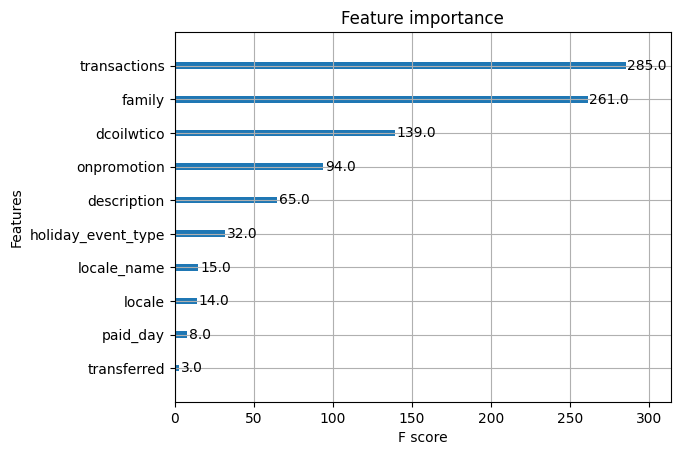

In [91]:
xgb.plot_importance(model_29.model)

# Model for each store

In [112]:
train_data['store_nbr'].nunique()

# value count 1     44583 
# nunique 1-54 (54 values)

54

In [ ]:
# Tuning hyperparameters
params = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'n_estimators': [50, 100, 150, 200, 250],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0.01, 0.1, 1, 10, 100]
}


In [33]:
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=params,
    n_iter=100,
    cv=5,
    n_jobs=-1,
    verbose=3
)


In [35]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 5/5] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=10, subsample=0.9;, score=0.772 total time= 3.6min
[CV 1/5] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=10, subsample=0.9;, score=0.783 total time= 3.6min
[CV 3/5] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=10, subsample=0.9;, score=0.758 total time= 3.6min
[CV 2/5] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=10, subsample=0.9;, score=0.786 total time= 3.7min
[CV 4/5] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=10, subsample=0.9;, score=0.

KeyboardInterrupt: 

[CV 2/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=0.01, subsample=0.6;, score=0.925 total time= 9.4min